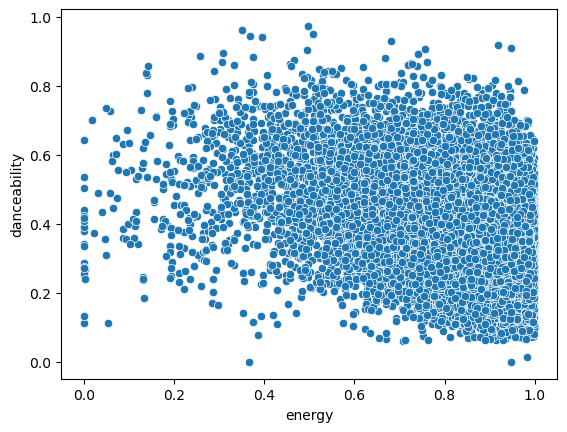

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

students = pd.read_csv("spotify_punk_sample.csv")

# Initial scatter
sns.scatterplot(data=students, x="energy", y="danceability")


# Feature selection + scaling
features = students[['energy', 'danceability', 'valence']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Remove NaNs
mask = ~np.isnan(features_scaled).any(axis=1)
X_clean = features_scaled[mask]

# DBSCAN
clustering = DBSCAN(eps=0.18, min_samples=10)
clustering.fit(X_clean)

# Attach labels back to dataframe
students = students.copy()
students["cluster"] = np.nan
students.loc[mask, "cluster"] = clustering.labels_

# k-distance (elbow) plot
neigh = NearestNeighbors(n_neighbors=4)
neigh.fit(X_clean)

distances, indices = neigh.kneighbors(X_clean)
distances = np.sort(distances[:, -1])

df = pd.DataFrame({
    "Points": range(len(distances)),
    "Distances": distances
})

<Axes: xlabel='Points', ylabel='Distances'>

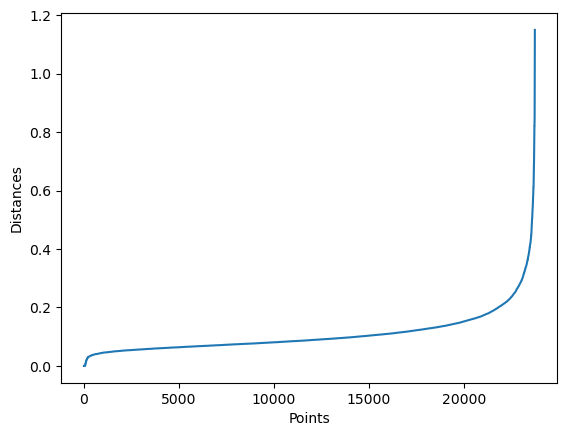

In [32]:
sns.lineplot(data=df, x="Points", y="Distances")